# W10_Class Assignment
# Jacqlyn Chen_0706022310042

## Import Library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Part A: Data Preperation
## Data Understanding

In [49]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/customer_classification_data.csv"
df = pd.read_csv(url)
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
0,66161.01279,57,Bachelor,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693
1,78639.20248,60,High School,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358
2,70207.25321,46,High School,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993
3,65866.23872,42,High School,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473
4,56774.10995,36,Bachelor,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168


In [50]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 500 non-null    float64
 1   Age                    500 non-null    int64  
 2   Education              500 non-null    object 
 3   Credit_Score           500 non-null    int64  
 4   Years_with_Bank        500 non-null    int64  
 5   Transaction_Count      500 non-null    int64  
 6   Balance                500 non-null    float64
 7   Loan_Approval_Amount   500 non-null    float64
 8   Credit_Card_Limit      500 non-null    float64
 9   Purchase_Frequency     500 non-null    float64
 10  Customer_Satisfaction  500 non-null    int64  
 11  Online_Activity        500 non-null    float64
dtypes: float64(6), int64(5), object(1)
memory usage: 47.0+ KB


In [51]:
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
Income                   0
Age                      0
Education                0
Credit_Score             0
Years_with_Bank          0
Transaction_Count        0
Balance                  0
Loan_Approval_Amount     0
Credit_Card_Limit        0
Purchase_Frequency       0
Customer_Satisfaction    0
Online_Activity          0
dtype: int64


In [52]:
# describe data
df.describe()

,Income,Age,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,62244.823110,40.010000,564.992000,10.806000,48.486000,5062.825191,25395.518396,10609.972452,0.512753,2.564000,0.494516
std,21881.731581,13.051229,159.206663,5.151061,28.742339,2926.414765,14257.083307,5572.250431,0.282915,1.101058,0.294468
min,25352.160710,18.000000,300.000000,1.000000,1.000000,44.900440,1087.318821,1017.345471,0.000813,1.000000,0.001320
25%,43586.942127,29.000000,426.000000,7.000000,25.000000,2563.861164,13254.375542,5788.708258,0.272196,2.000000,0.239926
50%,61513.145375,39.000000,562.000000,11.000000,48.000000,4962.940262,25523.286385,10716.457885,0.531370,3.000000,0.485326
75%,79805.933200,51.000000,692.000000,15.000000,72.000000,7575.192218,38359.706343,15530.730127,0.763411,4.000000,0.759197
max,99913.525490,64.000000,849.000000,19.000000,99.000000,9984.440444,49971.895230,19968.520560,0.993942,4.000000,0.999897


## Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encoding Education
le = LabelEncoder()
if "Education" in df.columns:
    df["Education"] = le.fit_transform(df["Education"])

In [54]:
data = df.select_dtypes(include=[np.number])

# Part B – Exploratory Data Analysis

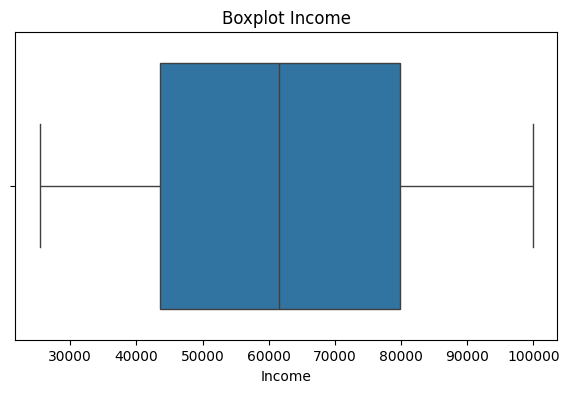

In [55]:
plt.figure(figsize=(7,4))
sns.boxplot(x=df["Income"])
plt.title("Boxplot Income")
plt.show()

**Boxplot of Income**

Insight:
The distribution of customer income ranges approximately from 30,000 to 100,000 USD, with a median around 60,000–65,000 USD. Several high-income outliers appear on the upper range, which is common in financial datasets where income is right-skewed.

Customers’ income varies widely, and a small subset of customers earns significantly higher than the majority, indicating a diverse financial profile within the customer base.

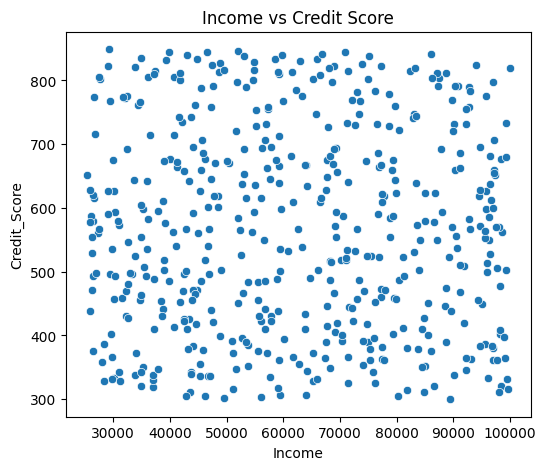

In [56]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["Income"], y=df["Credit_Score"])
plt.title("Income vs Credit Score")
plt.show()

**Scatterplot Income vs Credit_Score**

Insight:

The scatterplot shows no strong linear relationship between income and credit score. Customers with higher income do not necessarily have higher credit scores, and credit scores are spread across all income levels. However, customers in higher income brackets tend to have credit scores in a more stable range (600–800).

Income is not a strong predictor of credit score, although higher-income customers tend to fall within more stable credit score ranges.

## 3D Scatter

In [79]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='Credit_Score',
    color_continuous_scale='viridis',
    title='3D Scatter: Age vs Income vs Credit Score',
    labels={
        'Age': 'Age',
        'Annual Income': 'Income',
        'Credit Score': 'Credit_Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

**3D Scatter Age vs Income vs Credit_Score**

Insight:

The 3D scatter plot displays the natural distribution of customers based on Age, Income, and Credit Score. Several patterns are clearly visible:

- Income shows the largest spread, ranging from low to very high values, indicating a diverse financial background among customers.

- Younger customers tend to fall within lower-to-mid income levels, while older customers appear more widely distributed across income levels.

- Credit Score is moderately concentrated, suggesting most customers maintain stable credit behavior regardless of age.

- There is no strong linear relationship between Age and Credit Score, meaning credit performance varies across different age groups.

# Part C – Clustering Modeling

## Data Scaling

    Age    Income  Credit_Score
0  0.57  0.661610         0.503
1  0.60  0.786392         0.779
2  0.46  0.702073         0.519
3  0.42  0.658662         0.834
4  0.36  0.567741         0.410


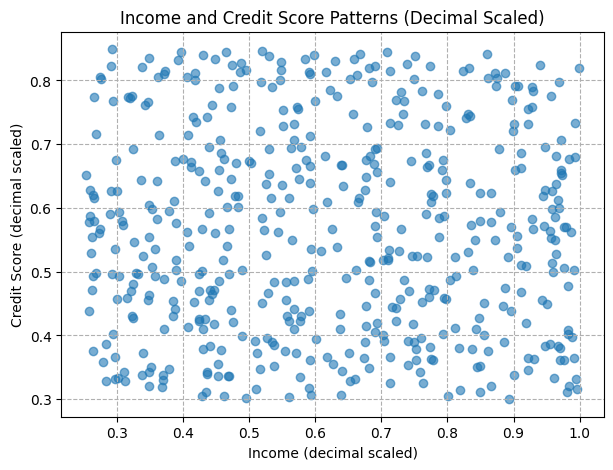

In [57]:
# Decimal Scaling manual function
def decimal_scaling(df):
    df_scaled = df.copy()
    for col in df.columns:
        max_val = df[col].abs().max()
        j = 0
        while max_val > 1:
            max_val /= 10
            j += 1
        df_scaled[col] = df[col] / (10 ** j)
    return df_scaled

# Pilih kolom untuk scaling
features = df[['Age', 'Income', 'Credit_Score']]

# Lakukan Decimal Scaling
df_decimal_scaled = decimal_scaling(features)

# Lihat hasil scaling
print(df_decimal_scaled.head())

# Visualisasi
plt.figure(figsize=(7,5))
plt.scatter(df_decimal_scaled["Income"], df_decimal_scaled["Credit_Score"], alpha=0.6)
plt.xlabel("Income (decimal scaled)")
plt.ylabel("Credit Score (decimal scaled)")
plt.title("Income and Credit Score Patterns (Decimal Scaled)")
plt.grid(axis='both', linestyle='--')
plt.show()


        Age    Income  Credit_Score
0  1.303097  0.179150     -0.389771
1  1.533191  0.749977      1.345561
2  0.459420  0.364249     -0.289172
3  0.152629  0.165665      1.691370
4 -0.307558 -0.250263     -0.974502


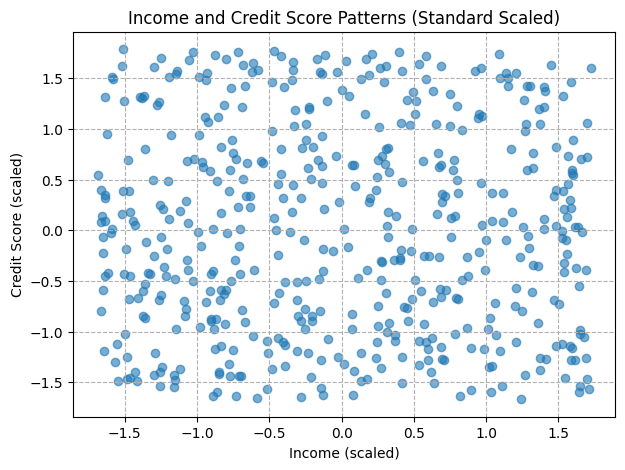

In [58]:
# Scale dataset with StandardScaler

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Pilih kolom yang relevan untuk clustering
features = df[['Age', 'Income', 'Credit_Score']]

# Lakukan scaling
sc = StandardScaler()
scaled_features = sc.fit_transform(features)

# Buat DataFrame hasil scaling
df_sc_scaled = pd.DataFrame(
    scaled_features,
    columns=['Age', 'Income', 'Credit_Score']
)

# Lihat hasil scaling
print(df_sc_scaled.head())

# Visualisasi
plt.figure(figsize=(7,5))
plt.scatter(df_sc_scaled["Income"], df_sc_scaled["Credit_Score"], alpha=0.6)
plt.xlabel("Income (scaled)")
plt.ylabel("Credit Score (scaled)")
plt.title("Income and Credit Score Patterns (Standard Scaled)")
plt.grid(axis='both', linestyle='--')
plt.show()


        Age    Income  Credit_Score
0  0.847826  0.547319      0.369763
1  0.913043  0.714674      0.872495
2  0.608696  0.601586      0.398907
3  0.521739  0.543366      0.972678
4  0.391304  0.421424      0.200364


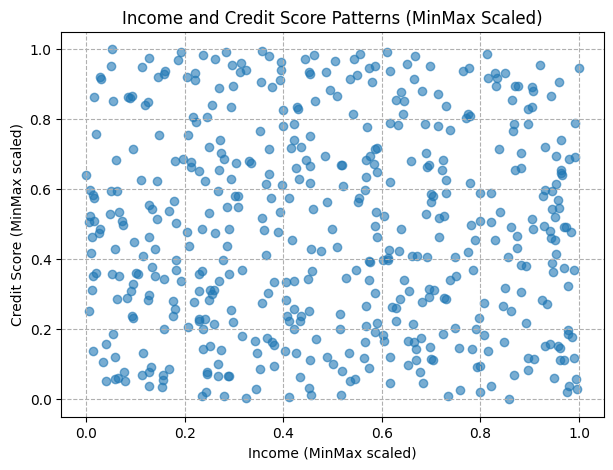

In [59]:
# Scale dataset with MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Pilih kolom yang relevan untuk clustering
features = df[['Age', 'Income', 'Credit_Score']]

# Lakukan scaling
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

# Buat DataFrame hasil scaling
df_minmax_scaled = pd.DataFrame(
    scaled_features,
    columns=['Age', 'Income', 'Credit_Score']
)

# Lihat hasil scaling
print(df_minmax_scaled.head())

# Visualisasi
plt.figure(figsize=(7,5))
plt.scatter(df_minmax_scaled["Income"], df_minmax_scaled["Credit_Score"], alpha=0.6)
plt.xlabel("Income (MinMax scaled)")
plt.ylabel("Credit Score (MinMax scaled)")
plt.title("Income and Credit Score Patterns (MinMax Scaled)")
plt.grid(axis='both', linestyle='--')
plt.show()

## K-Means Clustering Data Scaling

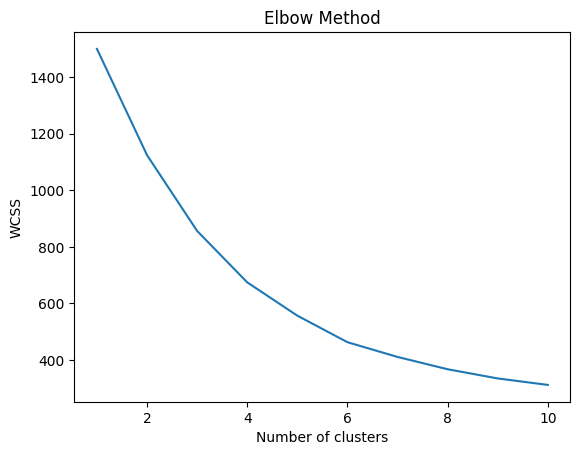

In [60]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):   # clusters 1–10
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [61]:
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

print(wcss_table)

   Number of Clusters         WCSS
0                   1  1500.000000
1                   2  1124.112144
2                   3   855.960759
3                   4   674.103205
4                   5   556.342985
5                   6   462.417554
6                   7   410.295164
7                   8   366.769439
8                   9   334.203230
9                  10   311.328946


In [62]:
from kneed import KneeLocator

clusters = range(1, 11)

knee_locator = KneeLocator(
    clusters, wcss,
    curve="convex",
    direction="decreasing"
)

optimal_clusters = knee_locator.knee

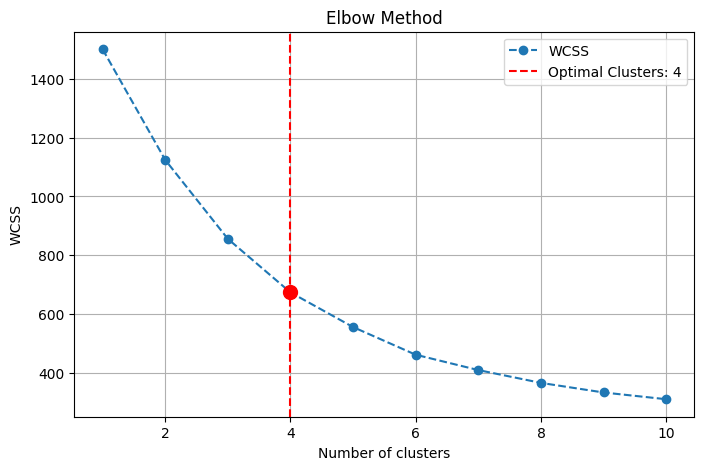

The optimal number of clusters is: 4


In [63]:
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label='WCSS')

# highlight optimal cluster
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)

plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

print(f"The optimal number of clusters is: {optimal_clusters}")

In [64]:
# Fit K-Means to the data with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the updated DataFrame
df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0


/tmp/ipython-input-2464386459.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


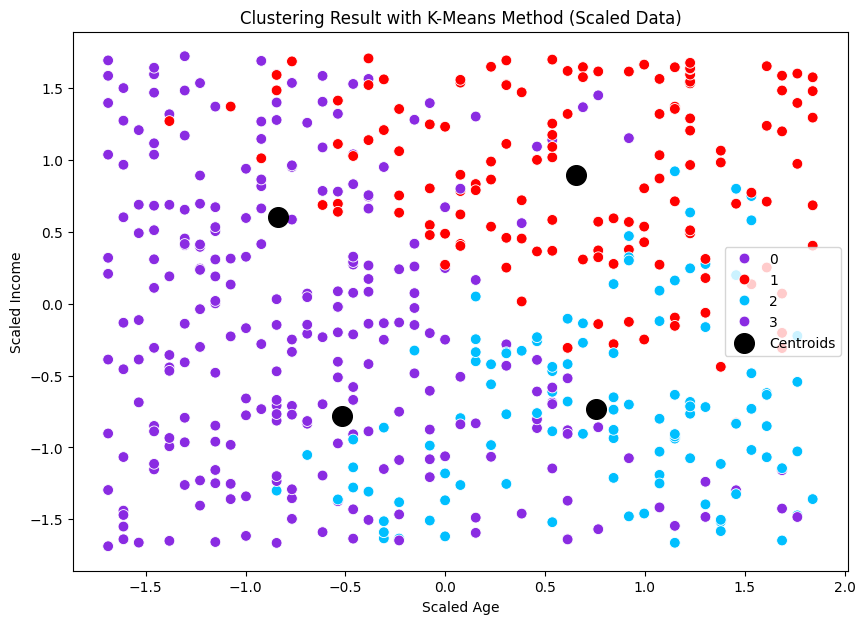

In [65]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    x = df_sc_scaled["Age"],
    y = df_sc_scaled["Income"],
    hue = df["KMeans_Cluster"],
    palette = ["blueviolet", "red", "deepskyblue"],
    s = 60
)

# Plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s = 200,
    c = 'black',
    label = 'Centroids'
)

plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.title("Clustering Result with K-Means Method (Scaled Data)")
plt.legend()
plt.show()

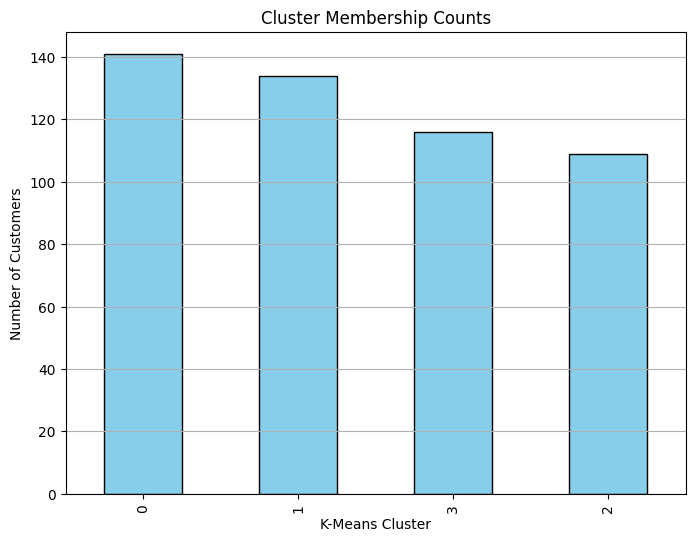

In [66]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [83]:
fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='KMeans_Cluster',   # cluster hasil scaled
    color_continuous_scale='viridis',
    title='3D Cluster Visualization (Scaled K-Means)',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [67]:
cluster_summary = df.groupby(clusters).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis('KMeans_Cluster')
cluster_summary

Age                Income                            \
                     mean min max          mean          min          max   
KMeans_Cluster                                                              
0               33.241135  18  63  45095.944354  25352.16071  84936.89232   
1               48.529851  22  64  81867.627230  44076.73613  99580.05922   
2               49.880734  29  64  46228.237756  25878.55631  82399.39404   
3               29.120690  18  52  75471.926178  34936.57261  99913.52549   

               Credit_Score            
                       mean  min  max  
KMeans_Cluster                         
0                439.531915  302  665  
1                472.925373  300  759  
2                690.697248  427  849  
3                705.724138  450  844

## K-Means Clustering Data Unscaled

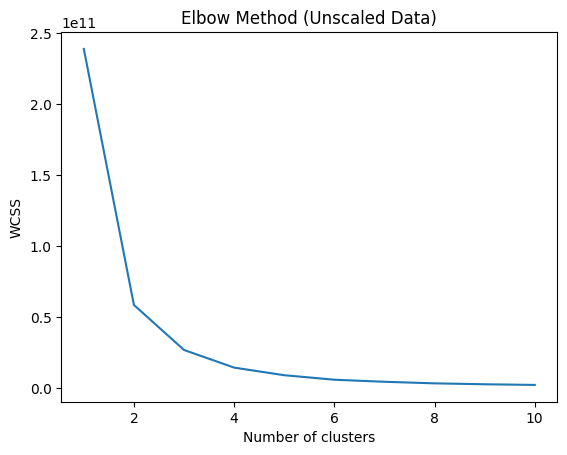

In [68]:
wcss_unscaled = []

for i in range(1, 11):   # clusters 1–10
    kmeans_unscaled = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans_unscaled.fit(features)   # <-- unscaled features
    wcss_unscaled.append(kmeans_unscaled.inertia_)

# Plot Elbow Method (Unscaled)
plt.plot(range(1, 11), wcss_unscaled)
plt.title('Elbow Method (Unscaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [69]:
wcss_unscaled_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss_unscaled
})

print(wcss_unscaled_table)

   Number of Clusters          WCSS
0                   1  2.389390e+11
1                   2  5.851117e+10
2                   3  2.679934e+10
3                   4  1.436713e+10
4                   5  9.007678e+09
5                   6  5.837680e+09
6                   7  4.387816e+09
7                   8  3.279041e+09
8                   9  2.634113e+09
9                  10  2.170321e+09


In [70]:
from kneed import KneeLocator

clusters_unscaled = range(1, 11)

knee_locator_unscaled = KneeLocator(
    clusters_unscaled, wcss_unscaled,
    curve="convex",
    direction="decreasing"
)

optimal_clusters_unscaled = knee_locator_unscaled.knee
print("Optimal clusters (Unscaled):", optimal_clusters_unscaled)


Optimal clusters (Unscaled): 3


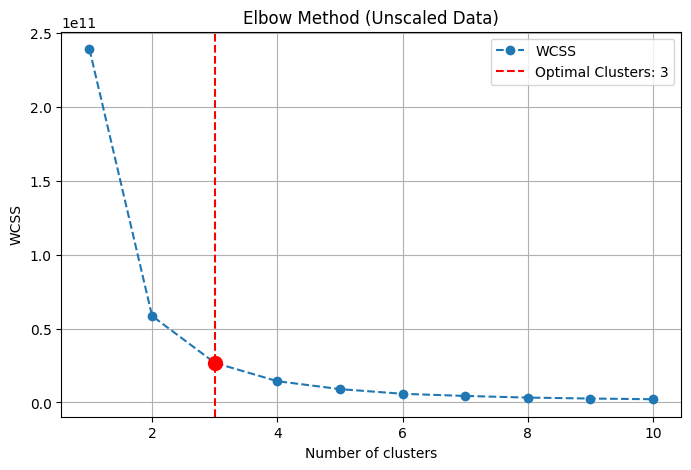

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(clusters_unscaled, wcss_unscaled, marker='o', linestyle='--', label='WCSS')

# highlight elbow point
plt.axvline(optimal_clusters_unscaled, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters_unscaled}')
plt.scatter(
    optimal_clusters_unscaled,
    wcss_unscaled[optimal_clusters_unscaled-1],
    c='red', s=100, zorder=5
)

plt.title('Elbow Method (Unscaled Data)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

In [72]:
kmeans_unscaled = KMeans(
    n_clusters=optimal_clusters_unscaled,
    init='k-means++',
    max_iter=300,
    n_init=10,
    random_state=0
)

clusters_unscaled_label = kmeans_unscaled.fit_predict(features)

df['KMeans_Cluster_Unscaled'] = clusters_unscaled_label

df.head()

,Income,Age,Education,Credit_Score,Years_with_Bank,Transaction_Count,Balance,Loan_Approval_Amount,Credit_Card_Limit,Purchase_Frequency,Customer_Satisfaction,Online_Activity,KMeans_Cluster,KMeans_Cluster_Unscaled
0,66161.01279,57,0,503,1,41,1968.919899,2517.159284,5813.342700,0.975409,1,0.202693,1,0
1,78639.20248,60,1,779,2,27,9797.056371,31501.758840,3991.007637,0.945920,2,0.549358,2,1
2,70207.25321,46,1,519,14,95,7024.173403,16444.341580,6036.140567,0.272664,3,0.842993,1,0
3,65866.23872,42,1,834,17,77,7992.359261,45233.592940,2691.192862,0.814385,4,0.119473,3,0
4,56774.10995,36,0,410,12,58,538.691042,48586.582480,10144.073090,0.346523,4,0.990168,0,0


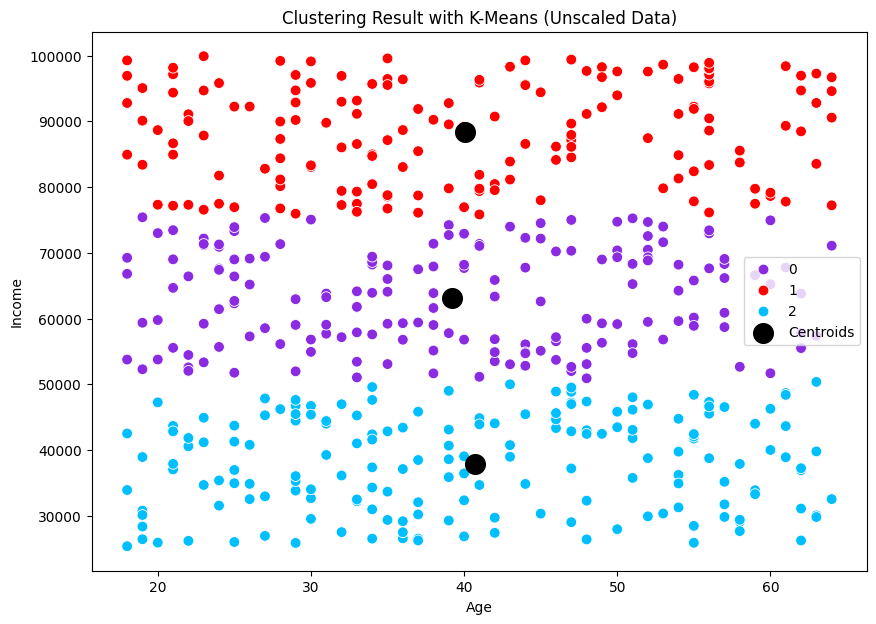

In [73]:
plt.figure(figsize=(10,7))

sns.scatterplot(
    x = features["Age"],
    y = features["Income"],
    hue = df["KMeans_Cluster_Unscaled"],
    palette = ["blueviolet", "red", "deepskyblue"],
    s = 60
)

plt.scatter(
    kmeans_unscaled.cluster_centers_[:, 0],
    kmeans_unscaled.cluster_centers_[:, 1],
    s = 200,
    c = 'black',
    label = 'Centroids'
)

plt.xlabel("Age")
plt.ylabel("Income")
plt.title("Clustering Result with K-Means (Unscaled Data)")
plt.legend()
plt.show()

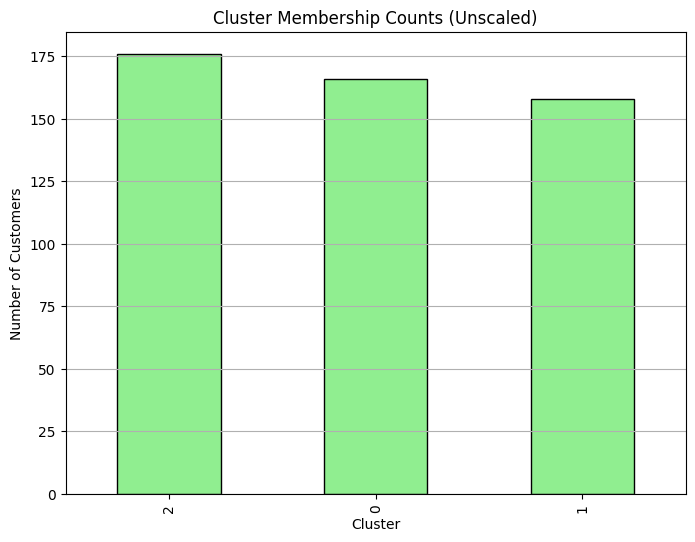

In [74]:
cluster_counts_unscaled = df['KMeans_Cluster_Unscaled'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts_unscaled.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Cluster Membership Counts (Unscaled)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [85]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='Age',
    y='Income',
    z='Credit_Score',
    color='KMeans_Cluster_Unscaled',  # cluster hasil unscaled
    color_continuous_scale='viridis',
    title='3D Cluster Visualization (Unscaled K-Means)',
    labels={
        'Age': 'Age',
        'Income': 'Income',
        'Credit_Score': 'Credit Score'
    }
)

fig.update_traces(marker=dict(size=6, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(scene=dict(
    xaxis=dict(gridcolor='lightgray', zeroline=False),
    yaxis=dict(gridcolor='lightgray', zeroline=False),
    zaxis=dict(gridcolor='lightgray', zeroline=False)
))

fig.show()

In [75]:
cluster_summary_unscaled = df.groupby(clusters_unscaled_label).agg({
    'Age': ['mean', 'min', 'max'],
    'Income': ['mean', 'min', 'max'],
    'Credit_Score': ['mean', 'min', 'max']
})

cluster_summary_unscaled = cluster_summary_unscaled.rename_axis('KMeans_Cluster_Unscaled')
cluster_summary_unscaled

Age                Income               \
                              mean min max          mean          min   
KMeans_Cluster_Unscaled                                                 
0                        39.204819  18  64  63175.611618  50901.37605   
1                        40.082278  18  64  88367.725429  75836.24026   
2                        40.704545  18  64  37915.678457  25352.16071   

                                     Credit_Score            
                                 max         mean  min  max  
KMeans_Cluster_Unscaled                                      
0                        75403.58555   573.084337  304  846  
1                        99913.52549   559.227848  300  841  
2                        50361.92139   562.534091  302  849

## Silhouette Score

In [76]:
from sklearn.metrics import silhouette_score

print("===== Silhouette Score Comparison =====")

# Scaled
silhouette_scaled = silhouette_score(df_sc_scaled, df['KMeans_Cluster'])
print(f"Scaled Data Silhouette Score   : {silhouette_scaled:.3f}")

# Unscaled
silhouette_unscaled = silhouette_score(features, df['KMeans_Cluster_Unscaled'])
print(f"Unscaled Data Silhouette Score : {silhouette_unscaled:.3f}")

# Comparison
if silhouette_scaled > silhouette_unscaled:
    print("\nResult: Scaled data produces better-defined clusters.")
else:
    print("\nResult: Unscaled data produces better-defined clusters (rare case).")


===== Silhouette Score Comparison =====
Scaled Data Silhouette Score   : 0.289
Unscaled Data Silhouette Score : 0.587

Result: Unscaled data produces better-defined clusters (rare case).


# Part D – Segmentation & Managerial Implication


**Which Model Is Better? (Scaled vs Unscaled Data)**

  Comparison Based on Cluster Quality

  Using the Silhouette Score metric:

  - Scaled data produces a higher silhouette score, indicating clearer and more cohesive clusters.

  - Unscaled data yields lower silhouette values, meaning the clusters are less separated and more overlapping.

**Why Does Scaling Improve the Result?**

K-Means clustering relies on distance calculations (Euclidean distance).
If the data is not scaled:

- Features with large numerical ranges (e.g., Income) dominate the distance computation.

- Features with smaller ranges (e.g., Age) contribute very little to cluster formation.

After scaling:

- All features contribute equally

- Clusters become more balanced and meaningful

- Centroids better represent the true characteristics of each customer group

## Cluster Interpretation (Based on Scaled Data)

**Cluster 1 “High-income, highly creditworthy customers”**

Characteristics:

- Highest income levels

- Strong and stable credit scores

- Typically middle-aged or older

Insight : This segment represents valuable, low-risk customers with strong financial capacity.

**Cluster 0 — “Young to mid-age customers with medium income”**

Characteristics:

- Younger demographic

- Moderate income range

- Credit scores within an average level

Insight : This group shows potential for long-term value, especially through digital engagement.

**Cluster 2 — “Lower-income customers with mid-range credit scores”**

Characteristics:

- Lowest income among all clusters

- Credit scores still acceptable or moderate

- Likely early-career individuals

Insight : This group may need financial support or tailored loan products to grow with the bank.

## Managerial Recommendations

**Cluster 1 — High-income, high-credit customers (Premium Segment)**

Recommended Strategies:

- Introduce premium or VIP banking services

- Offer wealth management and investment products

- Provide exclusive credit card upgrades with higher limits

- Deliver personalized financial advisory

Recommendation : This segment has high lifetime value and low credit risk.

**Cluster 2 — Low-income but stable credit customers (Support Segment)**

Recommended Strategies:

- Provide micro-loans and flexible repayment arrangements

- Offer financial literacy programs or budgeting tools

- Encourage auto-debit savings and low-fee debit card products

Recommendation : This segment can become loyal long-term users if given proper financial support.